In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./synthetic_dataset.csv")
data.insert(0,"x0",[1]*data.shape[0]) # added artificial co-ordinate to the dataset

In [2]:
def calculate_dot_sign(w,x):
    dot = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
    if dot >= 0:
        sign = 1
    else:
        sign = -1
    return sign

In [3]:
def count_missing_points(w):
    miss_points = []
    for i in range(data.shape[0]):
        x = []
        x.insert(0,data["x0"][i])
        x.insert(1,data["x1"][i])
        x.insert(2,data["x2"][i])
        hypo_y = calculate_dot_sign(w,x)
        if hypo_y != data["y"][i]:
            miss_points.append(i)
    return len(miss_points)

In [4]:
def check_missing_points(w):
    miss_points = []
    for i in range(data.shape[0]):
        x = []
        x.insert(0,data["x0"][i])
        x.insert(1,data["x1"][i])
        x.insert(2,data["x2"][i])
        hypo_y = calculate_dot_sign(w,x)
        if hypo_y != data["y"][i]:
            miss_points.append(i)
    return miss_points

In [5]:
def check_miss_points(w):
    for i in range(data.shape[0]):
        x = []
        x.insert(0,data["x0"][i])
        x.insert(1,data["x1"][i])
        x.insert(2,data["x2"][i])
        hypo_y = calculate_dot_sign(w,x)
        if hypo_y != data["y"][i]:
            return i
    return -10

In [6]:
def perceptron_algo(w):
    p_miss = check_miss_points(w)
    i = 0
    while p_miss != -10:
        w[0] = w[0] + data["y"][p_miss]*data["x0"][p_miss]
        w[1] = w[1] + data["y"][p_miss]*data["x1"][p_miss]
        w[2] = w[2] + data["y"][p_miss]*data["x2"][p_miss]
        p_miss = check_miss_points(w)
        i+=1
        if(i>10000):
            print("Perceptron Algorithm: The data is not linearly seperable or has some noisy data.")
            break
    if(i<10000):
        plot_graph(w)
        print("Final Weights (Perceptron):",w, "Number of Iterations:",i)

In [7]:
def pocket_algo(w):
    w_best = w
    w_best_points = count_missing_points(w_best)
    miss_points = tuple(check_missing_points(w_best))
    n = 1000 # maxnumber of iterations
    for i in range(n):
        j = miss_points[0]
        w[0] = w[0] + data["y"][j]*data["x0"][j]
        w[1] = w[1] + data["y"][j]*data["x1"][j]
        w[2] = w[2] + data["y"][j]*data["x2"][j]
        w_points = count_missing_points(w)

        if(w_points < w_best_points):
            w_best = tuple(w)
            w_best_points = w_points

        miss_points = tuple(check_missing_points(w))
        if(count_missing_points(w) == 0):
            w_best = tuple(w)
            w_best_points = w_points
            break

    plot_graph(w_best)
    print("Final Weights (Pocket):",w_best, "Number of Missclassified points:", w_best_points)


In [8]:
def plot_graph(w):
    x_vals = list(range(-11,11,1))
    y_vals = []
    for i in x_vals:
        y = -w[0]/w[2] - (w[1]/w[2] * i)
        y_vals.append(y)
    plt.plot(x_vals, y_vals, '--')

    color = np.where(data["y"]==1, "red", "blue")
    plt.scatter(list(data['x1']), list(data['x2']), c=color)
    plt.show()

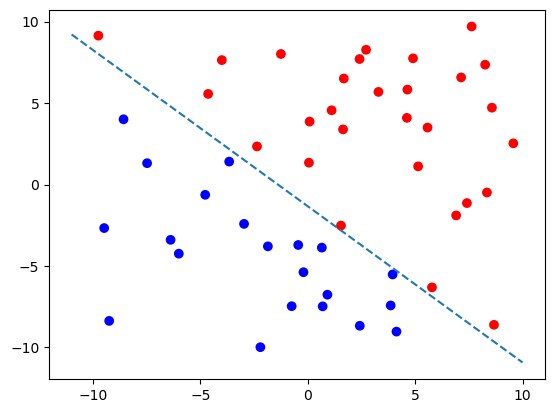

Final Weights (Perceptron): [12, 8.60155808, 8.976392324000004] Number of Iterations: 18


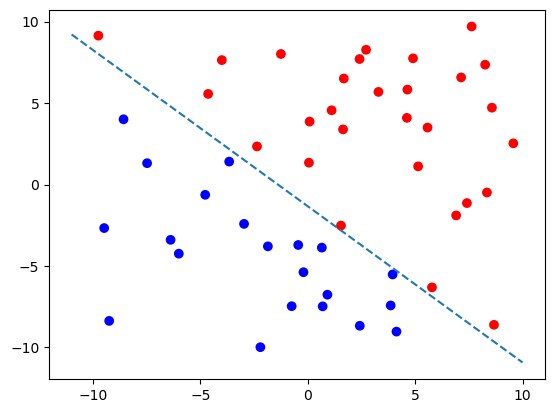

Final Weights (Pocket): (12, 8.60155808, 8.976392324000004) Number of Missclassified points: 0


In [9]:
w=[0,0,0] # initial hypothesis
perceptron_algo(w)
w = [0,0,0]
pocket_algo(w)